In [1]:
# Instalar bibliotecas necessárias (se ainda não estiverem disponíveis)
!pip install torch matplotlib scikit-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [3]:
# Gerar dados de duas classes para classificação binária
X_np, y_np = make_classification(n_samples=200, n_features=1, n_informative=1,
                                 n_redundant=0, n_clusters_per_class=1)

# Converter para tensores do PyTorch
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np.reshape(-1, 1), dtype=torch.float32)


In [4]:
class LogisticModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [5]:
# Modelos separados para MSE e BCE
model_mse = LogisticModel()
model_bce = LogisticModel()

# Funções de perda
loss_fn_mse = nn.MSELoss()
loss_fn_bce = nn.BCELoss()

# Otimizadores
optimizer_mse = optim.SGD(model_mse.parameters(), lr=0.01)
optimizer_bce = optim.SGD(model_bce.parameters(), lr=0.01)


In [6]:
epochs = 100
losses_mse = []
losses_bce = []

for epoch in range(epochs):
    # Treinamento MSE
    y_pred_mse = model_mse(X)
    loss_mse = loss_fn_mse(y_pred_mse, y)
    optimizer_mse.zero_grad()
    loss_mse.backward()
    optimizer_mse.step()
    losses_mse.append(loss_mse.item())

    # Treinamento BCE
    y_pred_bce = model_bce(X)
    loss_bce = loss_fn_bce(y_pred_bce, y)
    optimizer_bce.zero_grad()
    loss_bce.backward()
    optimizer_bce.step()
    losses_bce.append(loss_bce.item())


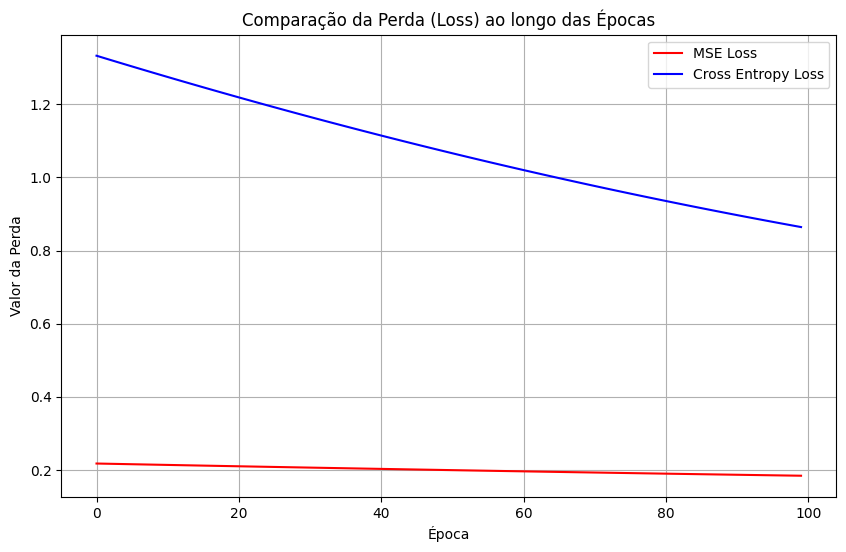

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(losses_mse, label='MSE Loss', color='red')
plt.plot(losses_bce, label='Cross Entropy Loss', color='blue')
plt.title('Comparação da Perda (Loss) ao longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Valor da Perda')
plt.legend()
plt.grid(True)
plt.show()


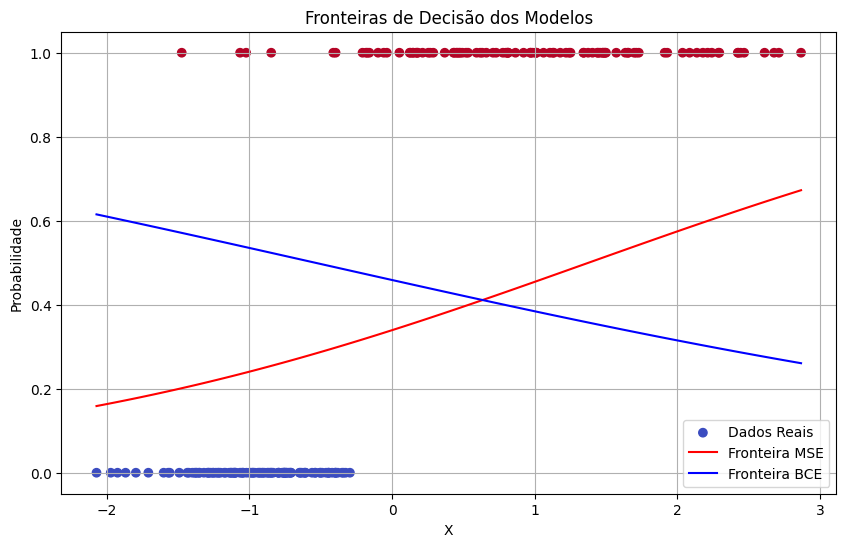

In [8]:
# Dados para visualização
x_vals = torch.linspace(X.min(), X.max(), 100).reshape(-1, 1)
with torch.no_grad():
    y_mse_out = model_mse(x_vals)
    y_bce_out = model_bce(x_vals)

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_np, y_np, c=y_np, cmap='coolwarm', label='Dados Reais')
plt.plot(x_vals.numpy(), y_mse_out.numpy(), label='Fronteira MSE', color='red')
plt.plot(x_vals.numpy(), y_bce_out.numpy(), label='Fronteira BCE', color='blue')
plt.title('Fronteiras de Decisão dos Modelos')
plt.xlabel('X')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid(True)
plt.show()
